# Object Detection using CNN

Objective is to correctly identify the type of fashion item using COnvolutional Neural Network (CNNs). CNN is far better than ANN for object detection as it detects the position independent pattern in the image. With CNN we can expect better results as compared to the fully connected neural network.

### Import required libraries

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

### Convolutional Neural Network Model

This CNN model contain five convolutional filters, two maxpooling filters and two hidden layers.

In [53]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same',
                       input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 256)        

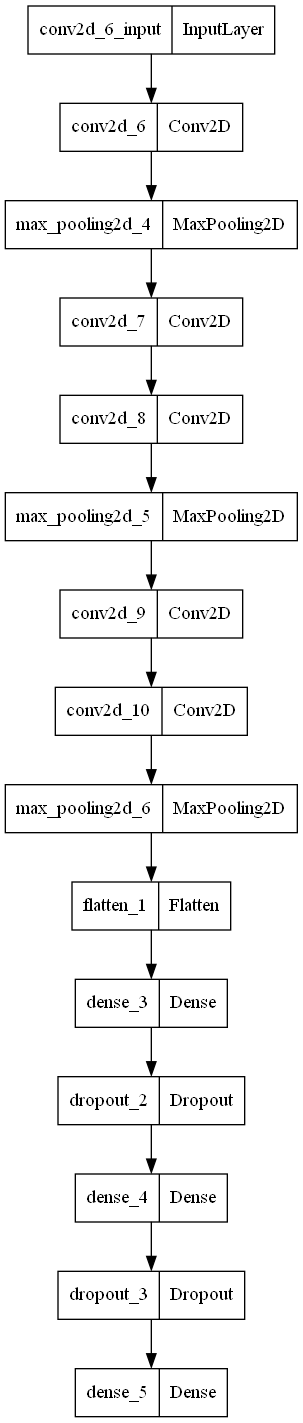

In [56]:
keras.utils.plot_model(model)

### Import the dataset

In [41]:
fminst = keras.datasets.fashion_mnist

In [42]:
(X_train_full, y_train_full), (X_test, y_test) = fminst.load_data()

In [43]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [44]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [45]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

### Fit CNN model

In [46]:
tensorboard_cb = keras.callbacks.TensorBoard('logs/first')

history = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/50
1719/1719 [==============================] - 201s 115ms/step - loss: 1.3796 - accuracy: 0.4963 - val_loss: 0.6928 - val_accuracy: 0.7532
Epoch 2/50
1719/1719 [==============================] - 190s 111ms/step - loss: 0.8050 - accuracy: 0.7053 - val_loss: 0.5508 - val_accuracy: 0.7884
Epoch 3/50
1719/1719 [==============================] - 191s 111ms/step - loss: 0.6732 - accuracy: 0.7541 - val_loss: 0.4666 - val_accuracy: 0.8198
Epoch 4/50
1719/1719 [==============================] - 192s 111ms/step - loss: 0.5941 - accuracy: 0.7869 - val_loss: 0.4296 - val_accuracy: 0.8410
Epoch 5/50
1719/1719 [==============================] - 191s 111ms/step - loss: 0.5488 - accuracy: 0.8055 - val_loss: 0.4076 - val_accuracy: 0.8512
Epoch 6/50
1719/1719 [==============================] - 187s 108ms/step - loss: 0.5095 - accuracy: 0.8220 - val_loss: 0.3672 - val_accuracy: 0.8620
Epoch 7/50
1719/1719 [==============================] - 185s 107ms/step - loss: 0.4795 - accuracy: 0.8314 - val_

<AxesSubplot:>

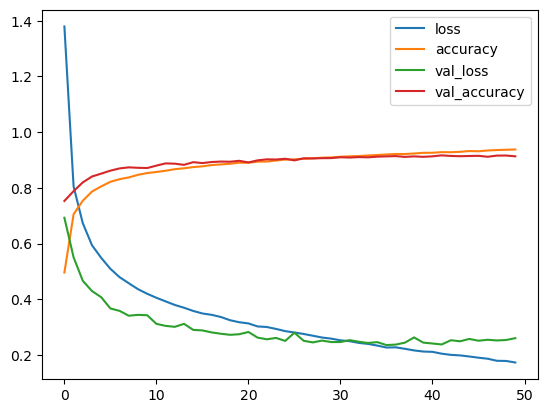

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()

With this fundamental architecture and SGD optimizer we have got *92%* of validation accuracy

We can try with ADAM optimizer as it require less memory is more efficient

In [48]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [49]:
tensorboard_cb = keras.callbacks.TensorBoard('logs/adam')

history1 = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/50
1719/1719 [==============================] - 207s 118ms/step - loss: 0.3777 - accuracy: 0.8714 - val_loss: 0.3012 - val_accuracy: 0.8904
Epoch 2/50
1719/1719 [==============================] - 204s 118ms/step - loss: 0.3352 - accuracy: 0.8849 - val_loss: 0.2826 - val_accuracy: 0.8986
Epoch 3/50
1719/1719 [==============================] - 204s 118ms/step - loss: 0.3159 - accuracy: 0.8900 - val_loss: 0.2961 - val_accuracy: 0.8892
Epoch 4/50
1719/1719 [==============================] - 215s 125ms/step - loss: 0.2907 - accuracy: 0.9005 - val_loss: 0.2714 - val_accuracy: 0.9002
Epoch 5/50
1719/1719 [==============================] - 210s 122ms/step - loss: 0.2722 - accuracy: 0.9048 - val_loss: 0.2522 - val_accuracy: 0.9104
Epoch 6/50
1719/1719 [==============================] - 206s 120ms/step - loss: 0.2585 - accuracy: 0.9105 - val_loss: 0.2708 - val_accuracy: 0.9012
Epoch 7/50
1719/1719 [==============================] - 215s 125ms/step - loss: 0.2483 - accuracy: 0.9134 - val_

<AxesSubplot:>

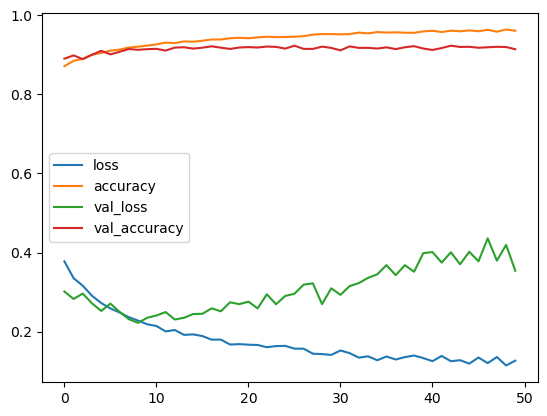

In [59]:
pd.DataFrame(history1.history).plot()

By using ADAM optimizer we have got 96.1% of training accuracy and 92.0% of validation accuracy. We can again increase the validation accuracy by using hyperparameter tuning and the regularization.